In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
#2.1 Loading the dataset

df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


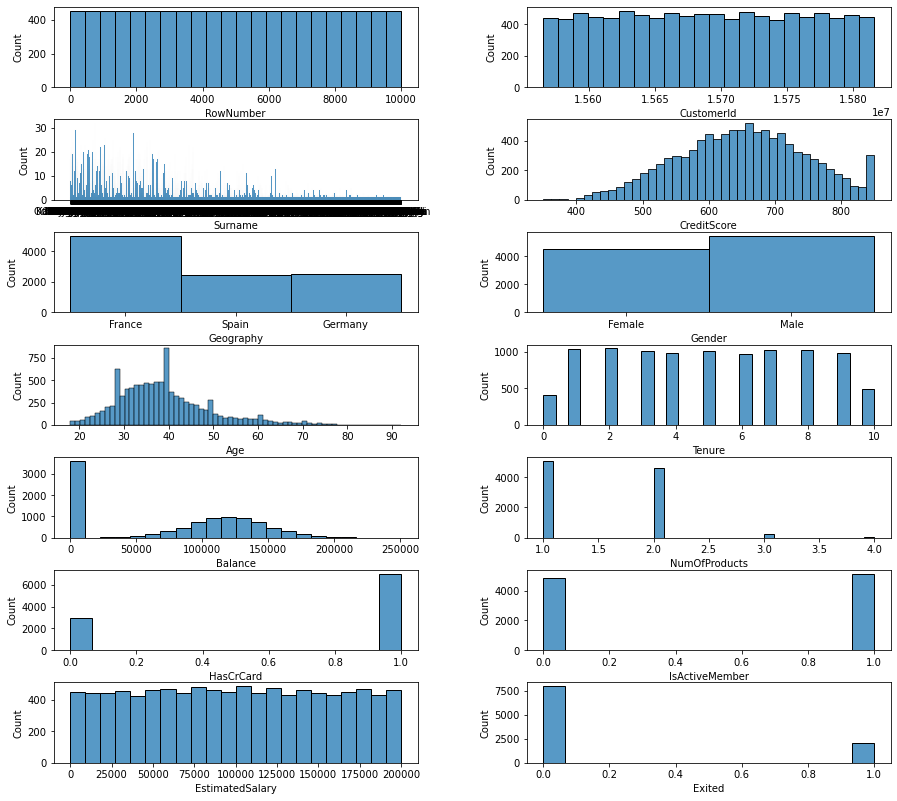

In [3]:
#3.1 Univariate Analysis

fig, ax = plt.subplots(7, 2, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.histplot(df[variable], ax=subplot)

<Figure size 576x432 with 0 Axes>

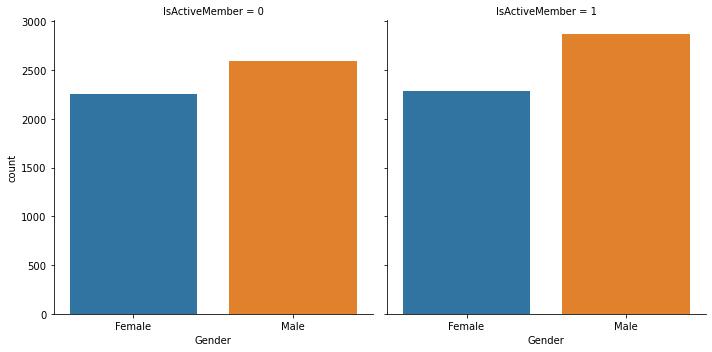

In [26]:
#3.2 Bivariate analysis to check wheater which country has more active member and less

plt.figure(figsize=(8,6))
sns.catplot(x='Gender', col='IsActiveMember', kind='count', data=df)

<Figure size 576x432 with 0 Axes>

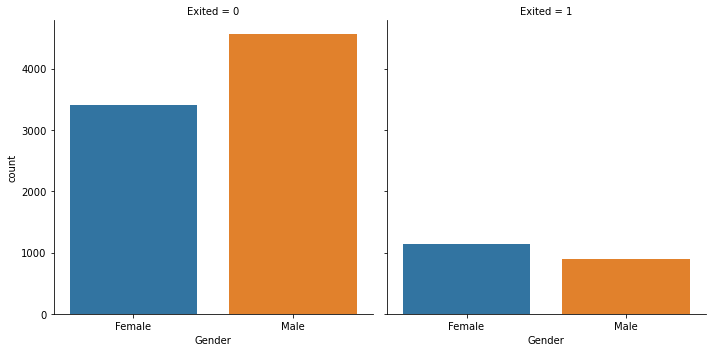

In [21]:
plt.figure(figsize=(8,6))
sns.catplot(x='Gender', col='Exited' ,kind='count', data=df)

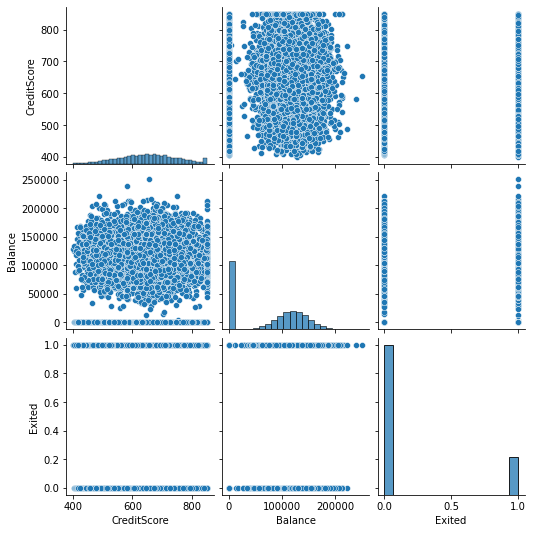

In [18]:
#3.3 Multivariate analysis

sns.pairplot(data=df[['CreditScore','Balance','Exited']])

In [23]:
#4 Descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.970500,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,95.884611,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,401.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#5 Handling missing values

df.isnull().any()
# No missing values

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

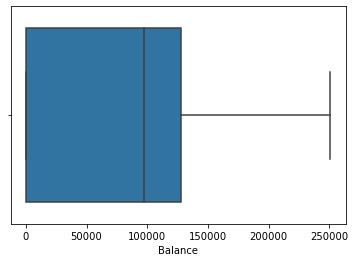

In [27]:
# Finding out ouliers

sns.boxplot(df['Balance'],data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

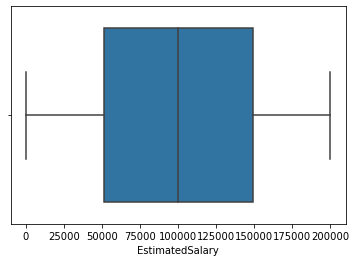

In [11]:
sns.boxplot(df['EstimatedSalary'],data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

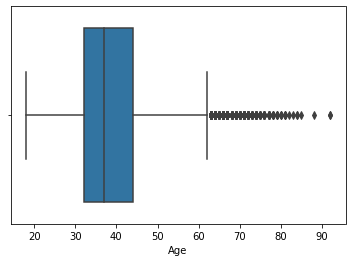

In [12]:
sns.boxplot(df['Age'],data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

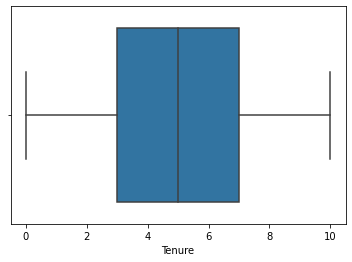

In [13]:
sns.boxplot(df['Tenure'],data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

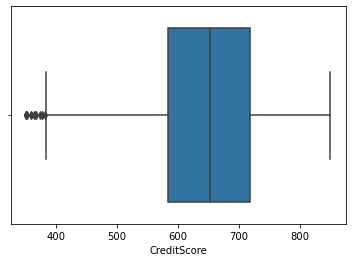

In [14]:
sns.boxplot(df['CreditScore'],data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

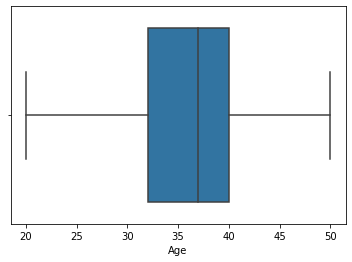

In [87]:
# Removal the outliers with mean

df['Age'] = np.where(df['Age'] > 70 , df['Age'].mean(), df['Age'])
df['Age'] = np.where(df['Age'] < 20 , df['Age'].mean(), df['Age'])
sns.boxplot(df['Age'],data=df)

In [88]:
#7 Checking for Categorical columns and performing encoding 
df.dtypes

RowNumber            int64
CustomerId           int64
Surname              int16
CreditScore          int64
Geography             int8
Gender                int8
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [89]:
# Categorical data: geography, gender, surname

In [90]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [91]:
df['Geography']=df['Geography'].astype('category')
df['Geography']=df['Geography'].cat.codes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [92]:
df['Surname']=df['Surname'].astype('category')
df['Surname']=df['Surname'].cat.codes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [93]:
#8 Spliting data into independent and dependent variables
# Seperating independent columns

X = df.iloc[:, :13]
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,1,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,0,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,1,42.0,3,75075.31,2,1,0,92888.52


In [94]:
# Seperating dependent columns
Y = df.iloc[:, 13:]
print(Y)

      Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]


In [95]:
#8 Standardise the independent variable
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)
print("Training:\nX:\n")
print(X_train)
print("\nY:\n")
print(Y_train)
print("\nTesting:\nX:\n")
print(X_test)
print("\nY:\n")
print(Y_train)

Training:
X:

[[-0.70407866 -1.32925244 -0.99363266 ... -1.54776799 -1.03067011
  -1.63907399]
 [-1.4893905   1.5641927  -0.47245587 ...  0.64609167 -1.03067011
  -0.07788133]
 [-0.52602383 -0.64302662 -0.14154996 ...  0.64609167  0.97024255
  -0.99524676]
 ...
 [-0.60119484 -1.62052514 -0.36136603 ...  0.64609167 -1.03067011
   1.41441489]
 [ 1.67853045 -0.37403866  0.72589622 ...  0.64609167  0.97024255
   0.84614739]
 [-0.78548505 -1.36411841  1.3829808  ...  0.64609167 -1.03067011
   0.32630495]]

Y:

      Exited
2967       1
700        0
3481       0
1621       1
800        0
...      ...
9225       0
4859       0
3264       0
9845       0
2732       1

[7500 rows x 1 columns]

Testing:
X:

[[ 1.52229946 -1.04525042  1.39834429 ...  0.64609167  0.97024255
   1.61304597]
 [-1.42080128 -0.50381294 -0.78208925 ...  0.64609167 -1.03067011
   0.49753166]
 [-0.90118604 -0.7932923   0.41271742 ...  0.64609167  0.97024255
  -0.4235611 ]
 ...
 [-1.02485447  0.26282149  1.61934216 ...  0.6